# Test the parsing using tf idf

In [1]:
from pathlib import Path
import numpy as np
from urllib import request
from sklearn.feature_extraction.text import TfidfVectorizer
import textdistance
import pandas as pd



## Load the Greek text (still working at the book level)

In [344]:
stop_words = request.urlopen("https://raw.githubusercontent.com/stopwords-iso/stopwords-el/master/raw/stop-words-greek.txt").read().decode("utf8").split("\r")
stop_words = [stop_word.strip() for stop_word in stop_words if len(stop_word.strip()) > 0]
stop_words.append('αὐτός')

In [368]:
# Load the greek text
greek_text = dict()
for file in Path("texts/sblgnt/").glob("*.txt"):
    book = file.name.split("-")[1]
    split_text = file.read_text(encoding="utf8").split("\n")
    text = ""
    for line in split_text:
        if line:
            word = line.split(" ")[-1]
            if word not in stop_words:
                text += word + " "
    greek_text[book] = text

In [369]:
tf_idf = TfidfVectorizer(norm="l2", use_idf=True)

In [370]:
X = tf_idf.fit(greek_text.values())

In [371]:
transformed_matrix = X.transform(greek_text.values())

## Perform k-means on the text

In [372]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [119]:
k_means = KMeans()

In [120]:
k_means.fit(transformed_matrix)

KMeans()

In [121]:
clustered_matrix = pd.DataFrame({"book": greek_text.keys(), "label": k_means.labels_})

In [137]:
def find_common_words(book_list):
    books = [greek_text[book].split(" ") for book in book_list]
    texts = {book: text for book, text in greek_text.items() if book in book_list}
    common_words = set(books[0]).intersection(*books[1:])
    detailed_dict = dict()
    summed_dict = dict()
    for word in common_words:
        if len(word) > 1:
            detailed_dict[word] = dict()
            summed_dict[word] = 0
            for title, text in texts.items():
                summed_dict[word] += text.count(word)
                detailed_dict[word].update({title: text.count(word)})
    return summed_dict, detailed_dict

def find_tf_idf(book_list, max_words):
    """
    Return all words with the highest tf idf threshold.
    """
    sum_ = tf_idf_counter.loc[book_list].mean(axis=0)
    sum_ = sum_.sort_values(ascending=False)
    return sum_[:max_words]

def find_uncommon_words(book_list):
    books = [greek_text[book].split(" ") for book in book_list]
    texts = {book: text for book, text in greek_text.items() if book in book_list}
    common_words = set(books[0]).symmetric_difference(*books)
    detailed_dict = dict()
    summed_dict = dict()
    for word in common_words:
        if len(word) > 1:
            detailed_dict[word] = dict()
            summed_dict[word] = 0
            print(texts)
            for title, text in texts.items():
                summed_dict[word] += text.count(word)
                detailed_dict[word].update({title: text.count(word)})
    return summed_dict, detailed_dict

In [373]:
tf_idf_counter = pd.DataFrame(transformed_matrix.todense())
tf_idf_counter.index = greek_text.keys()
tf_idf_counter.columns = tf_idf.get_feature_names()

In [374]:
k_means = KMeans(n_clusters=2)
k_means.fit(tf_idf_counter)

aggl = AgglomerativeClustering(n_clusters=5)
aggl.fit(tf_idf_counter)

AgglomerativeClustering(n_clusters=5)

In [146]:
clustered_matrix = pd.DataFrame({"book": greek_text.keys(), "label": aggl.labels_})

In [375]:
for label in np.unique(clustered_matrix.label):
    print(f"==== Most frequent words for cluster {label} =======")
    print(find_tf_idf(clustered_matrix.book[clustered_matrix.label == label], 5))

==== Most frequent words for cluster 0 =======
λέγω     0.375316
εἰς      0.199052
οὗτος    0.189056
ὅς       0.165944
θεός     0.153470
dtype: float64
==== Most frequent words for cluster 1 =======
θεός       0.254630
εἰς        0.230992
πᾶς        0.226464
ὅς         0.196651
χριστός    0.185616
dtype: float64
==== Most frequent words for cluster 2 =======
ἐπιδέχομαι    0.287320
ἀλήθεια       0.273376
μαρτυρέω      0.256469
εὐοδόομαι     0.232593
ὅς            0.197386
dtype: float64
==== Most frequent words for cluster 3 =======
χριστός      0.265117
σπλάγχνον    0.216108
ἰησοῦς       0.198838
κύριος       0.184530
ὅς           0.159883
dtype: float64
==== Most frequent words for cluster 4 =======
πᾶς        0.237486
ἵνα        0.228543
θεός       0.220523
σωτήρ      0.188017
ὑγιαίνω    0.172377
dtype: float64
==== Most frequent words for cluster 5 =======
κυρία      0.299200
ἐντολή     0.246492
ἀλήθεια    0.237233
πλάνος     0.223864
διδαχή     0.217953
dtype: float64
==== Most fre

## Plot the TSNE representation using Plotly

In [376]:
reduced_tf_idf = tf_idf_counter[tf_idf_counter > 0.01].dropna(axis=1, how="all").fillna(0)

In [377]:
from sklearn.manifold import TSNE, SpectralEmbedding, MDS
from sklearn.decomposition import PCA
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0, perplexity=50)
pca = PCA(n_components=3)
spectral = SpectralEmbedding(n_components=3, n_neighbors=5)
mds = MDS(n_components=3)
projections = tsne.fit_transform(reduced_tf_idf)
projections = pca.fit_transform(reduced_tf_idf)


fig = px.scatter_3d(
    projections,
    x=0, y=1, z=2,
    color=clustered_matrix.label.astype(str),
    labels={'color': 'cluster'},
)
fig.update_traces(marker_size=8)
fig.show()

## TF IDF + PCA

In [378]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [388]:
pca = PCA(n_components=3)
pca.fit(tf_idf_counter)

PCA(n_components=3)

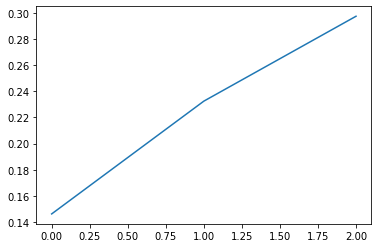

In [389]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [390]:
(pca.explained_variance_ratio_.cumsum() > 0.7).argmax()

0

In [391]:
from sklearn.cluster import DBSCAN

pca_tf_idf = pca.fit_transform(tf_idf_counter)
k_means = KMeans(n_clusters=8)
pca_tf_idf_cluster = k_means.fit(pca_tf_idf)

In [392]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += np.linalg.norm(points.iloc[i, :] - curr_center)
        sse.append(curr_sse)
    return sse

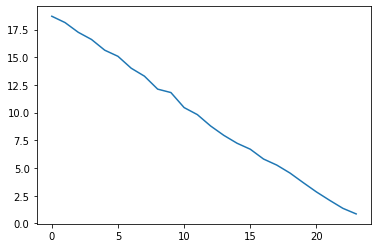

In [384]:
plt.plot(calculate_WSS(tf_idf_counter, 25))

In [393]:
clustered_matrix = pd.DataFrame({"book": greek_text.keys(), "label": pca_tf_idf_cluster.labels_})

In [394]:
from sklearn.manifold import TSNE, SpectralEmbedding, MDS
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
projections = pca.fit_transform(tf_idf_counter)


fig = px.scatter_3d(
    projections,
    x=0, y=1, z=2,
    color=clustered_matrix.label.astype(str),
    labels={'color': 'cluster'},
    text=clustered_matrix.book
)
fig.update_traces(marker_size=8)
fig.show()

In [396]:
find_tf_idf(book_list=clustered_matrix.book[clustered_matrix.label == 0], max_words=10)

λέγω           0.530189
εἰς            0.222805
οὗτος          0.185238
μαθητής        0.166636
ἰησοῦς         0.158717
ὅς             0.153373
ἔρχομαι        0.141530
ἀποκρίνομαι    0.128814
τίς            0.128043
πᾶς            0.114467
dtype: float64